<a href="https://colab.research.google.com/github/kristevalex/jupyterlab-tutorial/blob/master/regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from imblearn.over_sampling import RandomOverSampler
from sklearn.preprocessing import StandardScaler
import copy
import seaborn as sns
import tensorflow as tf
from sklearn.linear_model import LinearRegression
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


### Dataset:
Loading and analysis

In [4]:
df = pd.read_csv("drive/MyDrive/jupyter/Train.csv")
df.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,560,NaN,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,4510000
1,4,2011-1,232,0.0,3,60,3,0,25.0,NaN,...,0,0,0,0,0,0,0,0,0,3335000
2,5,2011-1,453,1.0,5,52,2,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,3612000
3,6,2011-1,44,NaN,1,33,1,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,559000
4,7,2011-1,74,2.0,16,44,1,2,20.0,0.0,...,0,0,0,0,0,0,0,0,0,4080000


In [31]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          70000 non-null  int64  
 1   date        70000 non-null  object 
 2   street_id   70000 non-null  int64  
 3   build_tech  49121 non-null  float64
 4   floor       70000 non-null  int64  
 5   area        70000 non-null  int64  
 6   rooms       70000 non-null  int64  
 7   balcon      70000 non-null  int64  
 8   metro_dist  70000 non-null  float64
 9   g_lift      70000 non-null  float64
 10  n_photos    70000 non-null  int64  
 11  kw1         70000 non-null  int64  
 12  kw2         70000 non-null  int64  
 13  kw3         70000 non-null  int64  
 14  kw4         70000 non-null  int64  
 15  kw5         70000 non-null  int64  
 16  kw6         70000 non-null  int64  
 17  kw7         70000 non-null  int64  
 18  kw8         70000 non-null  int64  
 19  kw9         70000 non-nul

In [ ]:
df.g_lift.describe()

In [ ]:
df.g_lift.value_counts()

In [ ]:
df.g_lift.notna().value_counts()

In [ ]:
df.g_lift = df.g_lift.fillna(0)
df.info()

(array([ 1062.,  3165.,     0.,  6088.,     0.,  8836., 10061.,     0.,
        11124., 26214.]),
 array([ 0.,  3.,  6.,  9., 12., 15., 18., 21., 24., 27., 30.]),
 <a list of 10 Patch objects>)

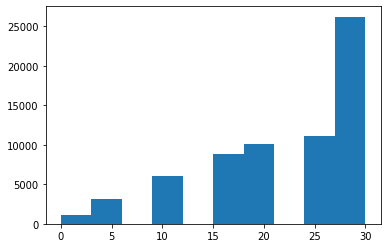

In [28]:
plt.hist(df.metro_dist)

In [29]:
df.metro_dist.fillna(df.metro_dist.mean()).value_counts()

30.000000    26214
25.000000    11124
20.000000    10061
15.000000     8836
10.000000     6088
22.163561     3450
5.000000      3165
0.000000      1062
Name: metro_dist, dtype: int64

In [32]:
df.build_tech.value_counts()

0.0    25082
1.0    22073
2.0     1966
Name: build_tech, dtype: int64

In [33]:
df.build_tech = df.build_tech.fillna(0)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 70000 entries, 0 to 69999
Data columns (total 25 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          70000 non-null  int64  
 1   date        70000 non-null  object 
 2   street_id   70000 non-null  int64  
 3   build_tech  70000 non-null  float64
 4   floor       70000 non-null  int64  
 5   area        70000 non-null  int64  
 6   rooms       70000 non-null  int64  
 7   balcon      70000 non-null  int64  
 8   metro_dist  70000 non-null  float64
 9   g_lift      70000 non-null  float64
 10  n_photos    70000 non-null  int64  
 11  kw1         70000 non-null  int64  
 12  kw2         70000 non-null  int64  
 13  kw3         70000 non-null  int64  
 14  kw4         70000 non-null  int64  
 15  kw5         70000 non-null  int64  
 16  kw6         70000 non-null  int64  
 17  kw7         70000 non-null  int64  
 18  kw8         70000 non-null  int64  
 19  kw9         70000 non-nul

In [ ]:
df.date.value_counts()

In [35]:
df.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,560,0.0,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,4510000
1,4,2011-1,232,0.0,3,60,3,0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,3335000
2,5,2011-1,453,1.0,5,52,2,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,3612000
3,6,2011-1,44,0.0,1,33,1,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,559000
4,7,2011-1,74,2.0,16,44,1,2,20.0,0.0,...,0,0,0,0,0,0,0,0,0,4080000


In [36]:
df.columns

Index(['id', 'date', 'street_id', 'build_tech', 'floor', 'area', 'rooms',
       'balcon', 'metro_dist', 'g_lift', 'n_photos', 'kw1', 'kw2', 'kw3',
       'kw4', 'kw5', 'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12',
       'kw13', 'price'],
      dtype='object')

In [39]:
df['price'].describe()

count    7.000000e+04
mean     5.137179e+06
std      4.196022e+06
min      4.890000e+05
25%      2.651000e+06
50%      4.090000e+06
75%      6.255000e+06
max      8.054800e+07
Name: price, dtype: float64

In [48]:
pd.Series([c for c in df.price if c < 935000]).value_counts()

915000    4
876000    4
866000    4
928000    4
927000    4
         ..
839000    1
836000    1
920000    1
675000    1
843000    1
Length: 196, dtype: int64

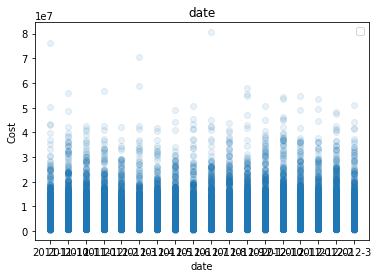

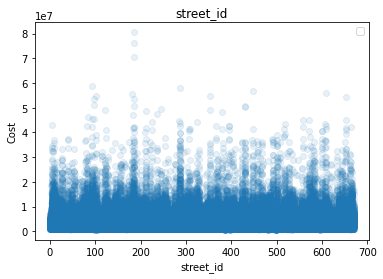

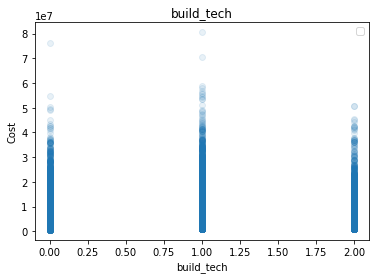

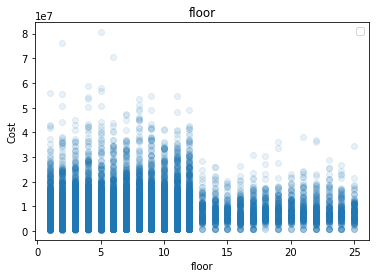

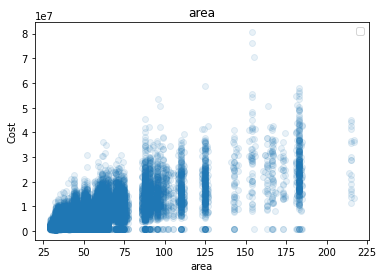

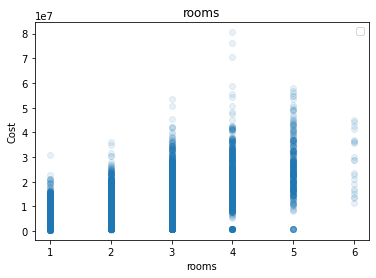

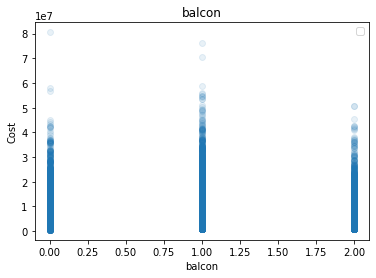

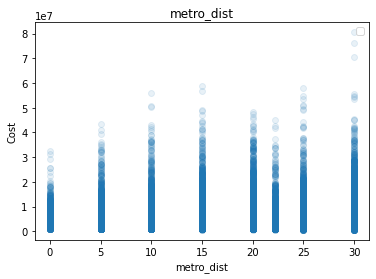

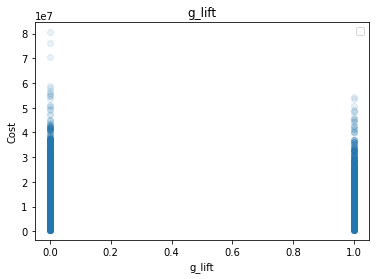

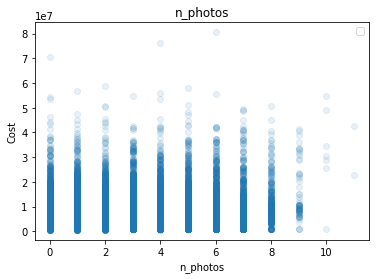

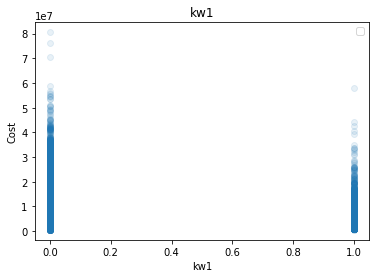

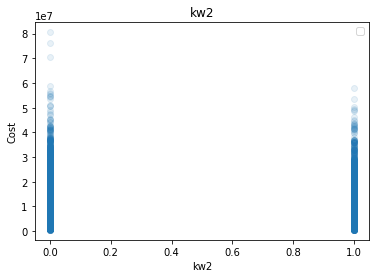

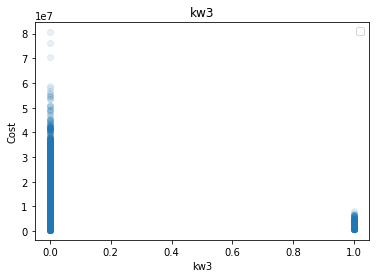

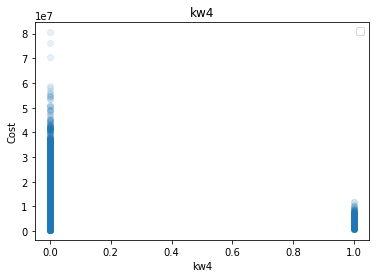

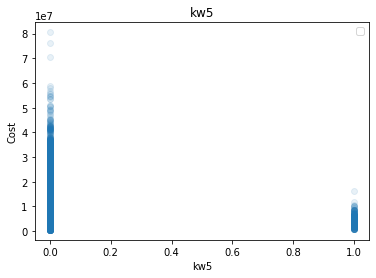

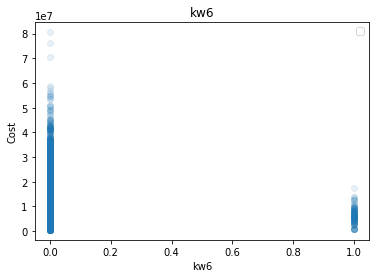

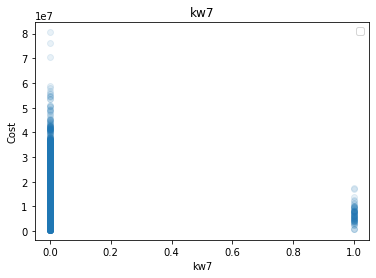

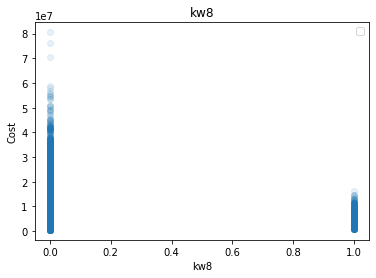

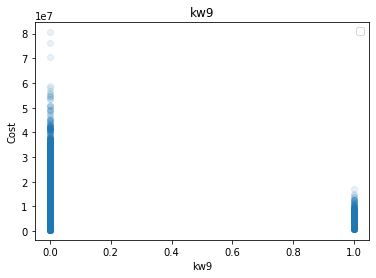

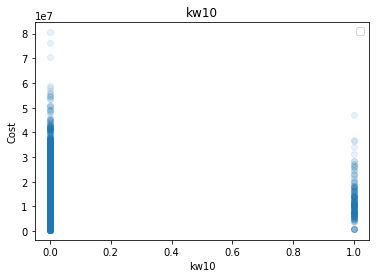

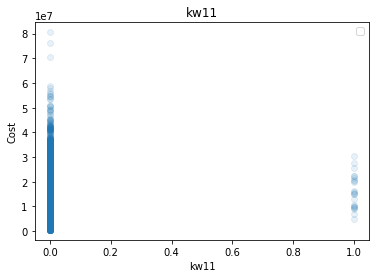

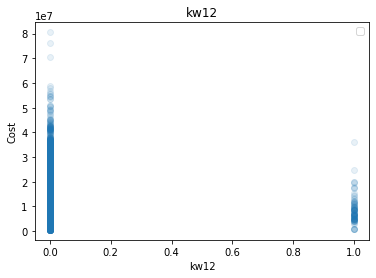

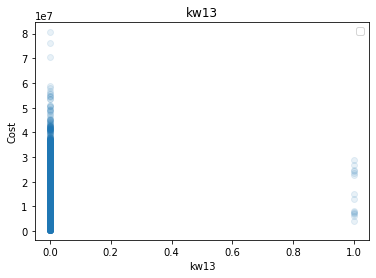

In [38]:
for label in df.columns[1:-1]:
  plt.scatter(df[label], df['price'], alpha=0.1)
  plt.title(label)
  plt.ylabel("Cost")
  plt.xlabel(label)
  plt.legend()
  plt.show()

In [30]:
df.metro_dist = df.metro_dist.fillna(df.metro_dist.mean())

In [49]:
df.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13,price
0,0,2011-1,560,0.0,2,59,3,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,4510000
1,4,2011-1,232,0.0,3,60,3,0,25.0,0.0,...,0,0,0,0,0,0,0,0,0,3335000
2,5,2011-1,453,1.0,5,52,2,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,3612000
3,6,2011-1,44,0.0,1,33,1,0,30.0,1.0,...,0,0,0,0,0,0,0,0,0,559000
4,7,2011-1,74,2.0,16,44,1,2,20.0,0.0,...,0,0,0,0,0,0,0,0,0,4080000


In [ ]:
df.drop(["wind", "visibility", "functional"], axis=1)

In [ ]:
df.head()

,bike_count,temp,humidity,dew_pt_temp,radiation,rain,snow
12,449,1.7,23,-17.2,1.11,0.0,0.0
36,479,4.3,41,-7.8,1.09,0.0,0.0
60,333,5.8,85,3.4,0.43,0.0,0.0
84,393,-0.3,38,-12.9,1.11,0.0,0.0
108,321,-2.3,25,-19.7,0.00,0.0,0.0


# Train/valid/test dataset

In [50]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])

In [150]:
def get_xy(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  y = dataframe[y_label].values.reshape(-1, 1)
  data = np.hstack((X, y))

  return data, X, y

def get_x(dataframe, y_label, x_labels=None):
  dataframe = copy.deepcopy(dataframe)
  if x_labels is None:
    X = dataframe[[c for c in dataframe.columns if c!=y_label]].values
  else:
    if len(x_labels) == 1:
      X = dataframe[x_labels[0]].values.reshape(-1, 1)
    else:
      X = dataframe[x_labels].values

  return X

In [55]:
_, X_train_temp, y_train_temp = get_xy(train, "price", x_labels=["area"])
_, X_val_temp, y_val_temp = get_xy(val, "price", x_labels=["area"])
_, X_test_temp, y_test_temp = get_xy(test, "price", x_labels=["area"])

In [63]:
temp_reg = LinearRegression()
temp_reg.fit(X_train_temp, y_train_temp)

LinearRegression()

In [64]:
temp_reg.score(X_test_temp, y_test_temp)

0.4271706962327082

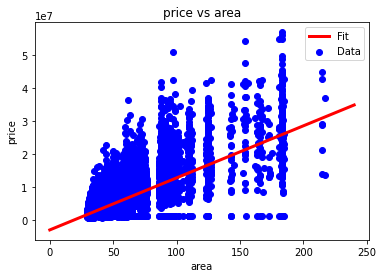

In [65]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(0, 240, 100)
plt.plot(x, temp_reg.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("price vs area")
plt.ylabel("price")
plt.xlabel("area")
plt.show()

# Multiple Linear Regression

In [70]:
df.columns[2:-1]

Index(['street_id', 'build_tech', 'floor', 'area', 'rooms', 'balcon',
       'metro_dist', 'g_lift', 'n_photos', 'kw1', 'kw2', 'kw3', 'kw4', 'kw5',
       'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12', 'kw13'],
      dtype='object')

In [71]:
train, val, test = np.split(df.sample(frac=1), [int(0.6*len(df)), int(0.8*len(df))])
_, X_train_all, y_train_all = get_xy(train, "price", x_labels=df.columns[2:-1])
_, X_val_all, y_val_all = get_xy(val, "price", x_labels=df.columns[2:-1])
_, X_test_all, y_test_all = get_xy(test, "price", x_labels=df.columns[2:-1])

In [72]:
all_reg = LinearRegression()
all_reg.fit(X_train_all, y_train_all)

LinearRegression()

In [73]:
all_reg.score(X_test_all, y_test_all)

0.5318783828280392

In [74]:
y_pred_lr = all_reg.predict(X_test_all)

# Regression with Neural Net

In [90]:
def plot_loss(history):
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='val_loss')
  plt.xlabel('Epoch')
  plt.ylabel('MSE')
  plt.legend()
  plt.grid(True)
  plt.show()

In [91]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

In [92]:
temp_nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(1)
])

In [102]:
temp_nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=500), loss='mean_squared_error')

In [103]:
history = temp_nn_model.fit(
    X_train_temp.reshape(-1), y_train_temp,
    verbose=0,
    epochs=20,
    validation_data=(X_val_temp, y_val_temp)
)

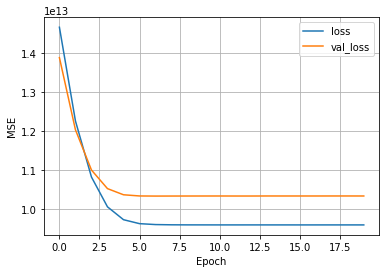

In [104]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


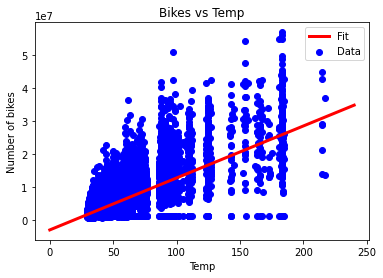

In [105]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(0, 240, 100)
plt.plot(x, temp_nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

# Neural Net

In [112]:
temp_normalizer = tf.keras.layers.Normalization(input_shape=(1,), axis=None)
temp_normalizer.adapt(X_train_temp.reshape(-1))

nn_model = tf.keras.Sequential([
    temp_normalizer,
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(32, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=1), loss='mean_squared_error')

In [113]:
history = nn_model.fit(
    X_train_temp, y_train_temp,
    validation_data=(X_val_temp, y_val_temp),
    verbose=0, epochs=20
)

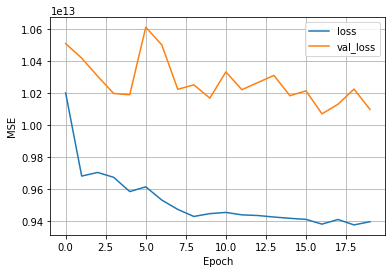

In [114]:
plot_loss(history)

4/4 [==============================] - 0s 3ms/step


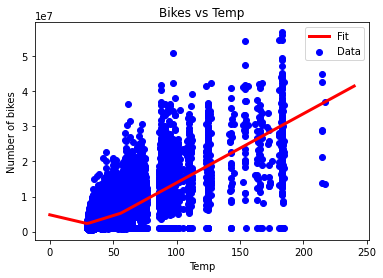

In [115]:
plt.scatter(X_train_temp, y_train_temp, label="Data", color="blue")
x = tf.linspace(0, 240, 100)
plt.plot(x, nn_model.predict(np.array(x).reshape(-1, 1)), label="Fit", color="red", linewidth=3)
plt.legend()
plt.title("Bikes vs Temp")
plt.ylabel("Number of bikes")
plt.xlabel("Temp")
plt.show()

###Multi-dimentional

In [268]:
all_normalizer = tf.keras.layers.Normalization(input_shape=(len(X_train_all[0]),), axis=-1)
all_normalizer.adapt(X_train_all)

In [270]:
nn_model = tf.keras.Sequential([
    all_normalizer,
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(16, activation='relu'),
    tf.keras.layers.Dense(1)
])
nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.01), loss='mean_squared_error')

In [258]:
history = nn_model.fit(
    X_train_all, y_train_all,
    validation_data=(X_val_all, y_val_all),
    verbose=0, epochs=15
)

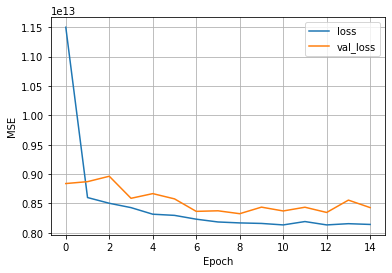

In [259]:
plot_loss(history)

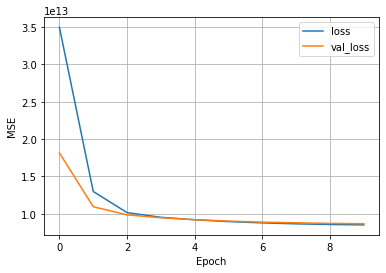

438/438 [==============================] - 1s 1ms/step
layersnum 2, layersize 16, lr 0.01, iters 10, err 8823725245663.096
---------------------------------------------------------------------------------------


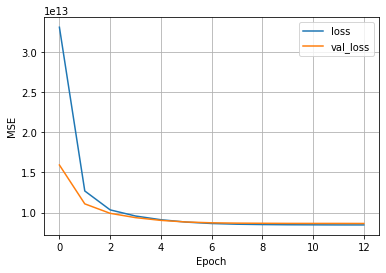

438/438 [==============================] - 1s 1ms/step
layersnum 2, layersize 16, lr 0.01, iters 13, err 8767596093524.378
---------------------------------------------------------------------------------------


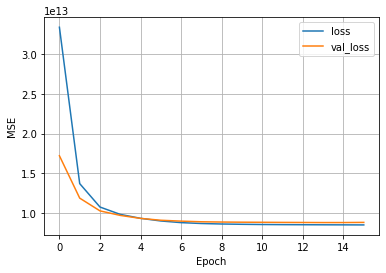

438/438 [==============================] - 1s 1ms/step
layersnum 2, layersize 16, lr 0.01, iters 16, err 8767905758486.096
---------------------------------------------------------------------------------------


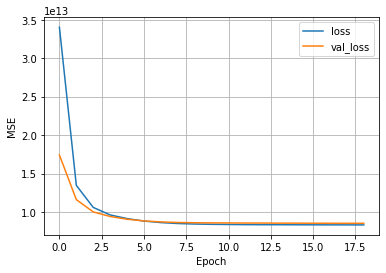

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.01, iters 19, err 8600813348296.144
---------------------------------------------------------------------------------------


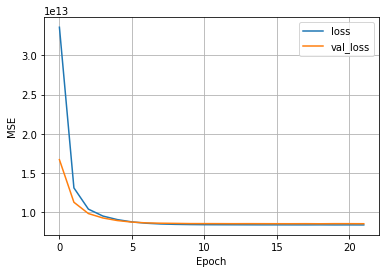

438/438 [==============================] - 1s 1ms/step
layersnum 2, layersize 16, lr 0.01, iters 22, err 8731789631124.122
---------------------------------------------------------------------------------------


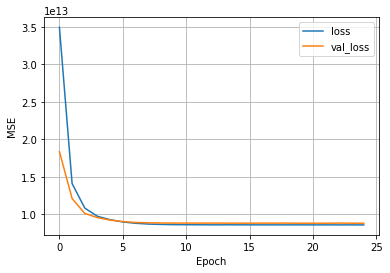

438/438 [==============================] - 1s 1ms/step
layersnum 2, layersize 16, lr 0.01, iters 25, err 8885436876408.076
---------------------------------------------------------------------------------------


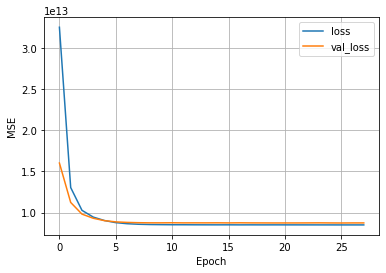

438/438 [==============================] - 1s 1ms/step
layersnum 2, layersize 16, lr 0.01, iters 28, err 8820332461246.307
---------------------------------------------------------------------------------------


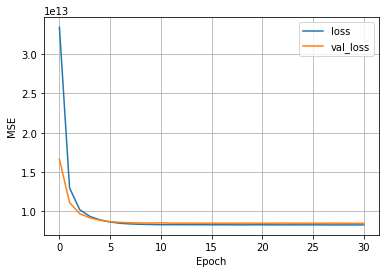

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.01, iters 31, err 8633217542874.823
---------------------------------------------------------------------------------------


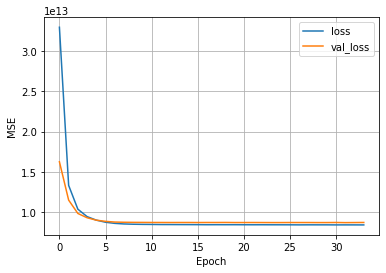

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.01, iters 34, err 8733013203417.55
---------------------------------------------------------------------------------------


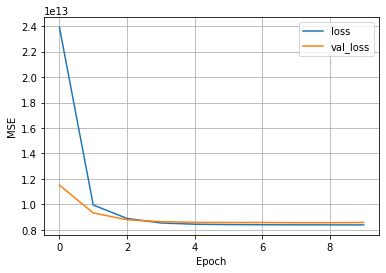

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.02, iters 10, err 8726206610004.8125
---------------------------------------------------------------------------------------


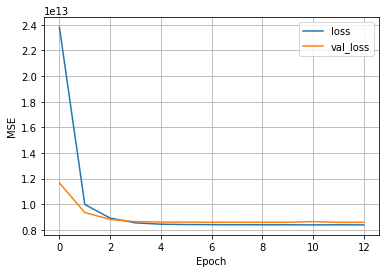

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.02, iters 13, err 8695281843801.773
---------------------------------------------------------------------------------------


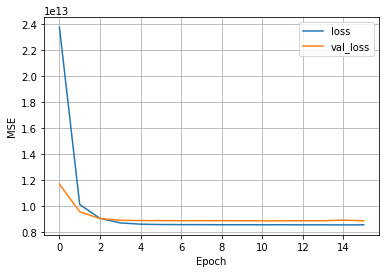

438/438 [==============================] - 1s 1ms/step
layersnum 2, layersize 16, lr 0.02, iters 16, err 8810027666812.34
---------------------------------------------------------------------------------------


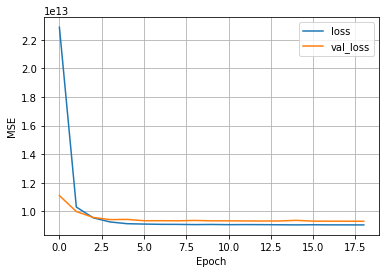

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.02, iters 19, err 9265042038557.098
---------------------------------------------------------------------------------------


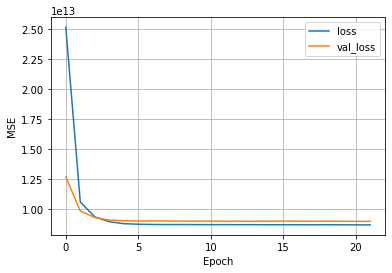

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.02, iters 22, err 8967968283611.89
---------------------------------------------------------------------------------------


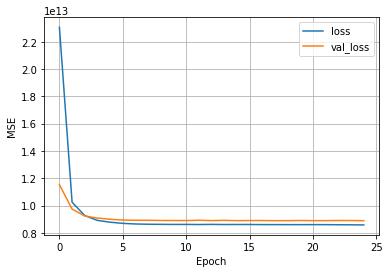

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.02, iters 25, err 8877491008819.25
---------------------------------------------------------------------------------------


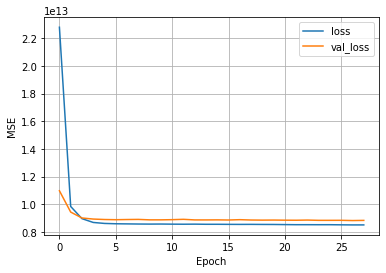

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.02, iters 28, err 8820325374438.252
---------------------------------------------------------------------------------------


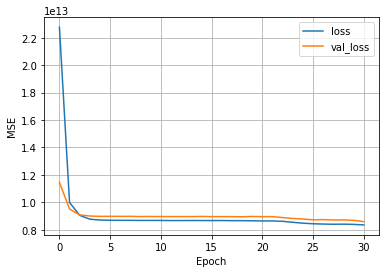

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.02, iters 31, err 8668773012930.515
---------------------------------------------------------------------------------------


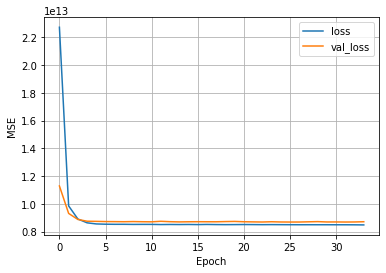

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.02, iters 34, err 8835138543101.12
---------------------------------------------------------------------------------------


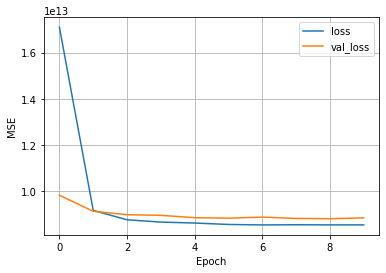

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.04, iters 10, err 8886244107380.467
---------------------------------------------------------------------------------------


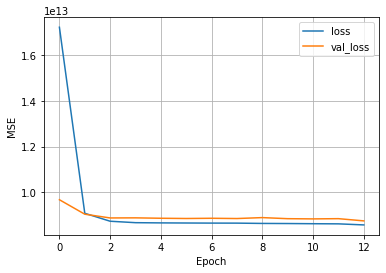

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.04, iters 13, err 8813647596305.963
---------------------------------------------------------------------------------------


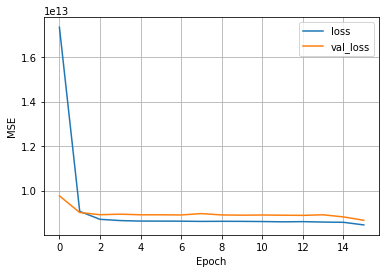

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.04, iters 16, err 8765073107774.176
---------------------------------------------------------------------------------------


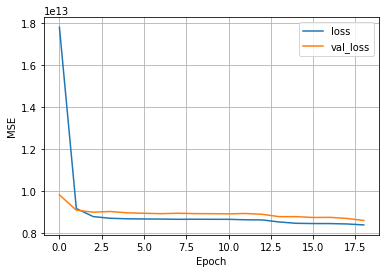

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.04, iters 19, err 8703785150837.12
---------------------------------------------------------------------------------------


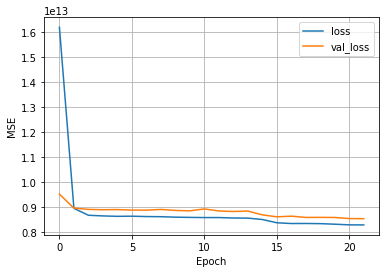

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.04, iters 22, err 8596748046800.512
---------------------------------------------------------------------------------------


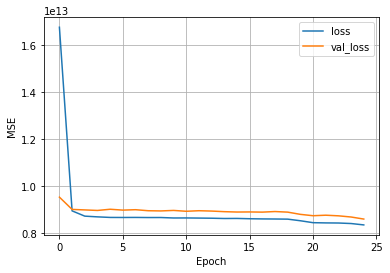

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.04, iters 25, err 8616140116604.556
---------------------------------------------------------------------------------------


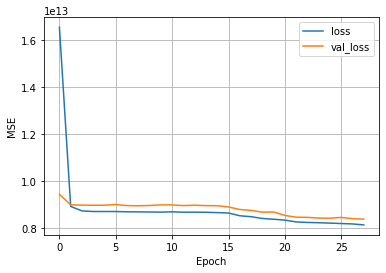

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.04, iters 28, err 8438538618943.492
---------------------------------------------------------------------------------------


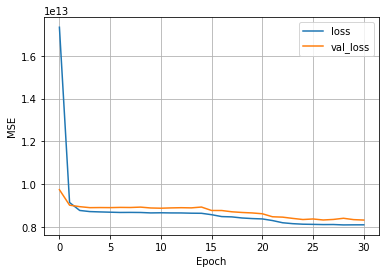

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.04, iters 31, err 8436640385987.479
---------------------------------------------------------------------------------------


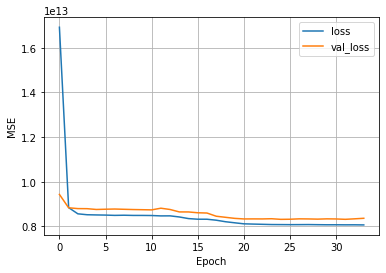

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.04, iters 34, err 8418599642724.016
---------------------------------------------------------------------------------------


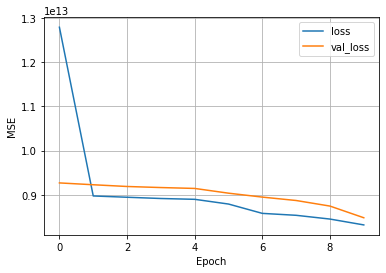

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.1, iters 10, err 8592635036705.029
---------------------------------------------------------------------------------------


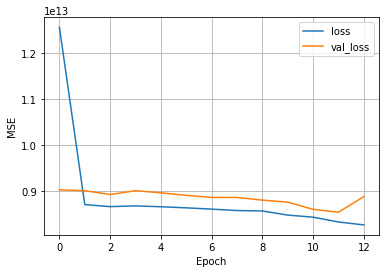

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.1, iters 13, err 8768951710326.427
---------------------------------------------------------------------------------------


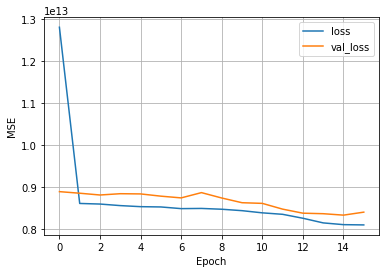

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.1, iters 16, err 8548138871046.827
---------------------------------------------------------------------------------------


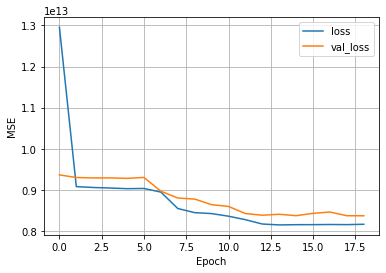

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.1, iters 19, err 8432495160508.827
---------------------------------------------------------------------------------------


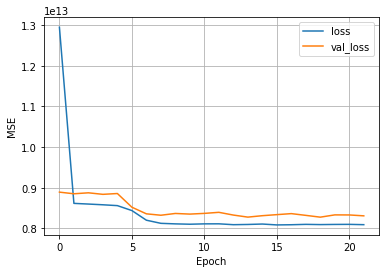

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.1, iters 22, err 8415060179447.655
---------------------------------------------------------------------------------------


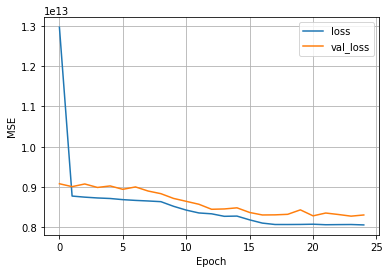

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.1, iters 25, err 8403644459930.648
---------------------------------------------------------------------------------------


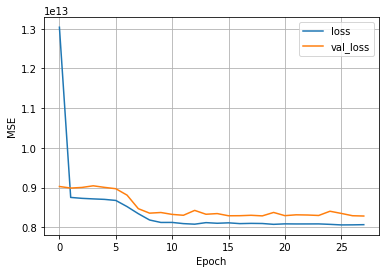

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.1, iters 28, err 8408177832781.424
---------------------------------------------------------------------------------------


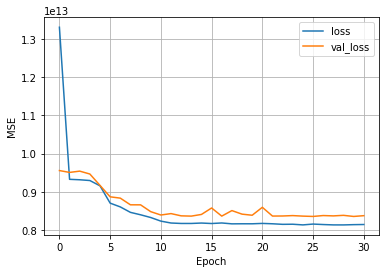

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.1, iters 31, err 8411623103490.343
---------------------------------------------------------------------------------------


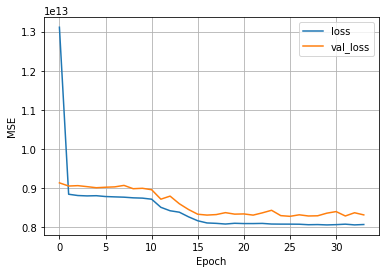

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.1, iters 34, err 8388125802199.964
---------------------------------------------------------------------------------------


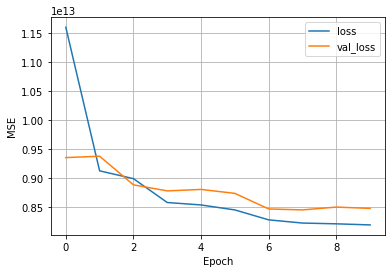

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.2, iters 10, err 8497688541546.747
---------------------------------------------------------------------------------------


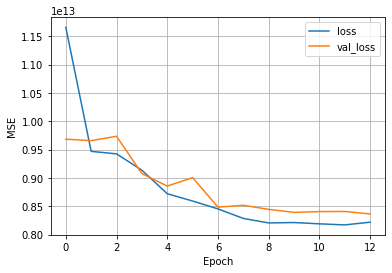

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.2, iters 13, err 8421461926245.234
---------------------------------------------------------------------------------------


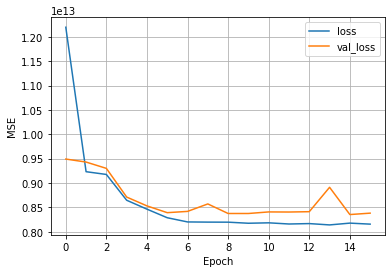

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.2, iters 16, err 8408396203449.295
---------------------------------------------------------------------------------------


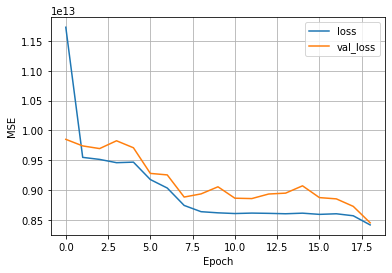

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.2, iters 19, err 8492732482179.562
---------------------------------------------------------------------------------------


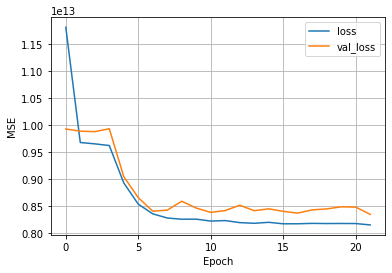

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.2, iters 22, err 8396826511916.357
---------------------------------------------------------------------------------------


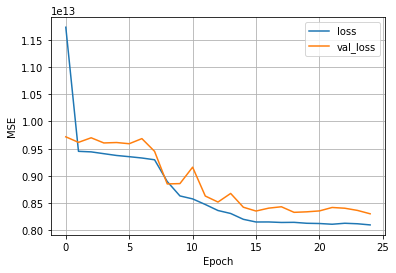

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.2, iters 25, err 8392339291912.1875
---------------------------------------------------------------------------------------


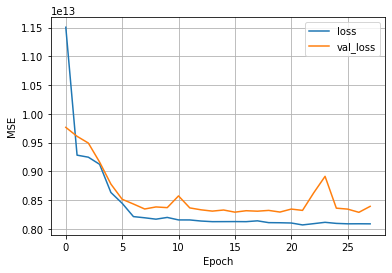

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.2, iters 28, err 8415066538512.213
---------------------------------------------------------------------------------------


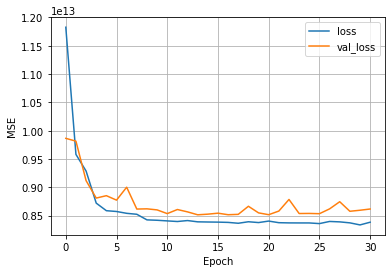

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.2, iters 31, err 8783785592255.536
---------------------------------------------------------------------------------------


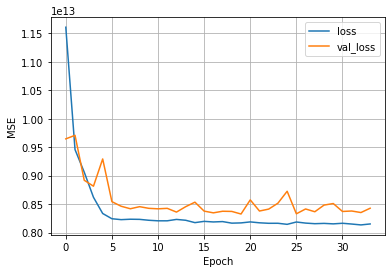

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.2, iters 34, err 8439029351307.52
---------------------------------------------------------------------------------------


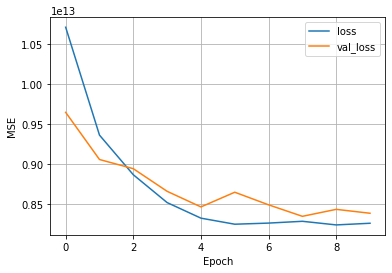

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.4, iters 10, err 8409639608545.027
---------------------------------------------------------------------------------------


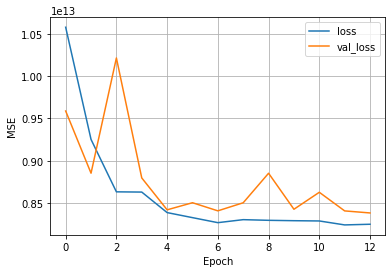

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.4, iters 13, err 8418065638999.737
---------------------------------------------------------------------------------------


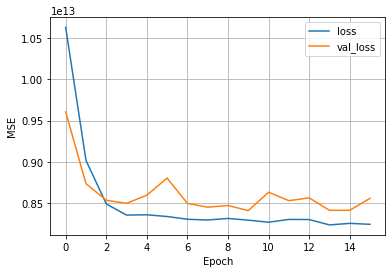

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.4, iters 16, err 8625676120846.571
---------------------------------------------------------------------------------------


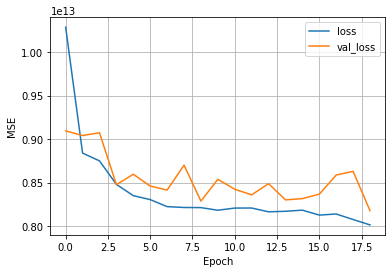

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.4, iters 19, err 8318742012530.324
---------------------------------------------------------------------------------------


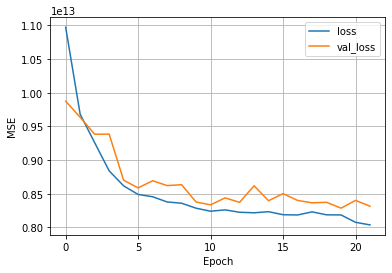

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.4, iters 22, err 8294642743124.638
---------------------------------------------------------------------------------------


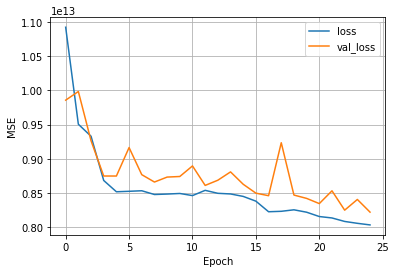

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.4, iters 25, err 8303559852310.263
---------------------------------------------------------------------------------------


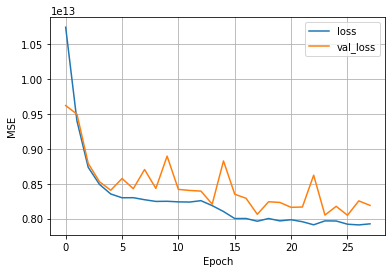

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.4, iters 28, err 8292584792802.424
---------------------------------------------------------------------------------------


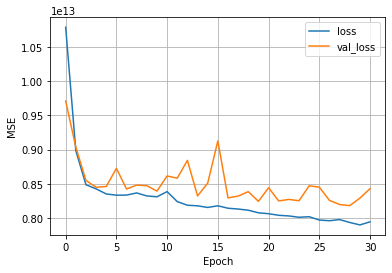

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.4, iters 31, err 8601357081945.129
---------------------------------------------------------------------------------------


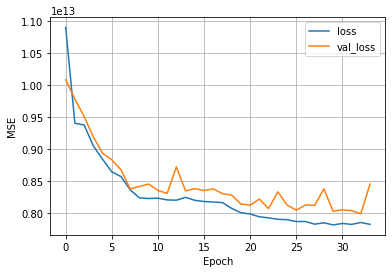

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 16, lr 0.4, iters 34, err 8433276635198.7
---------------------------------------------------------------------------------------


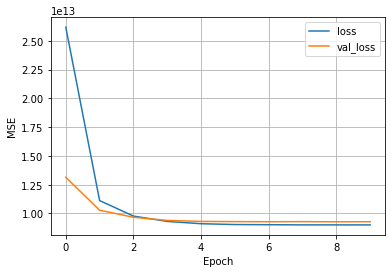

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.01, iters 10, err 9189322947691.207
---------------------------------------------------------------------------------------


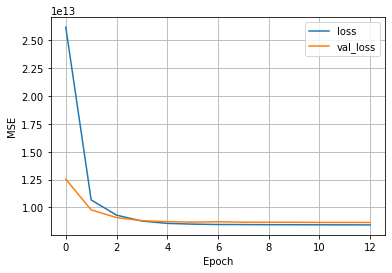

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.01, iters 13, err 8719455619563.731
---------------------------------------------------------------------------------------


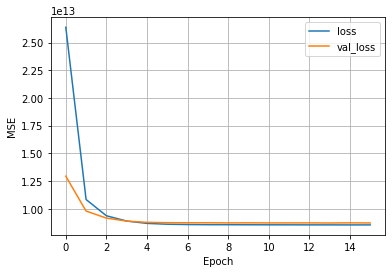

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.01, iters 16, err 8847042419829.787
---------------------------------------------------------------------------------------


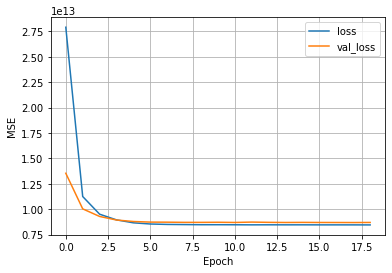

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.01, iters 19, err 8799041728134.8
---------------------------------------------------------------------------------------


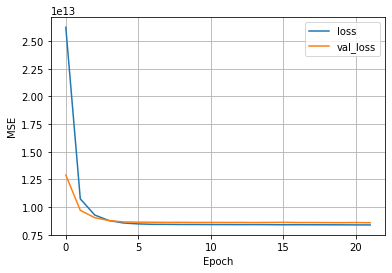

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.01, iters 22, err 8652788011935.75
---------------------------------------------------------------------------------------


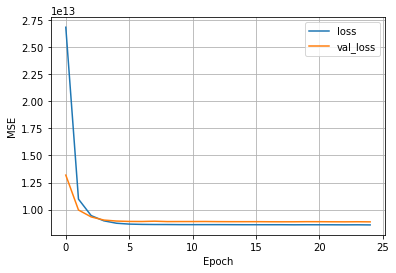

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.01, iters 25, err 8920748623005.264
---------------------------------------------------------------------------------------


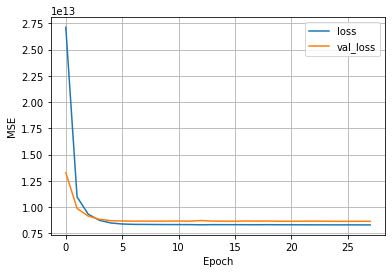

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.01, iters 28, err 8654415484256.917
---------------------------------------------------------------------------------------


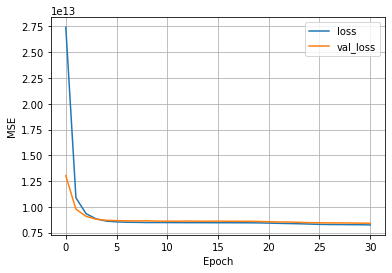

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.01, iters 31, err 8615225761591.261
---------------------------------------------------------------------------------------


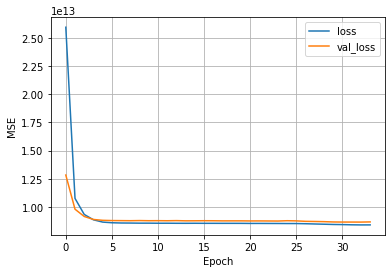

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.01, iters 34, err 8695406299390.482
---------------------------------------------------------------------------------------


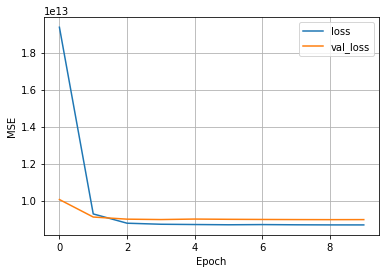

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.02, iters 10, err 8971959776013.867
---------------------------------------------------------------------------------------


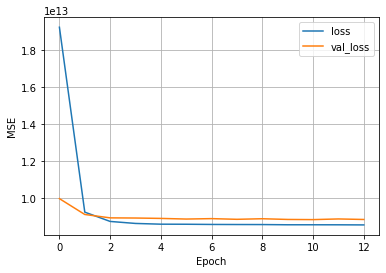

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.02, iters 13, err 8902282027002.26
---------------------------------------------------------------------------------------


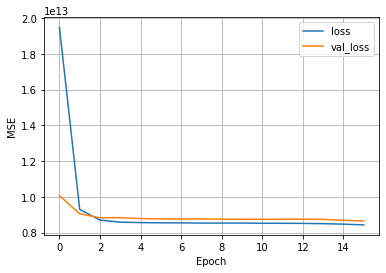

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.02, iters 16, err 8714367516727.934
---------------------------------------------------------------------------------------


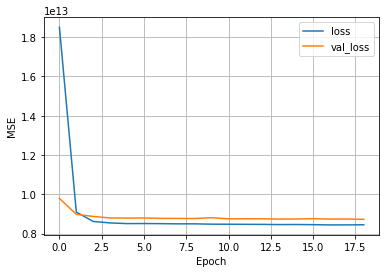

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.02, iters 19, err 8779140453570.382
---------------------------------------------------------------------------------------


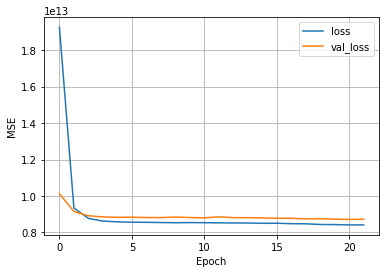

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.02, iters 22, err 8741270974850.146
---------------------------------------------------------------------------------------


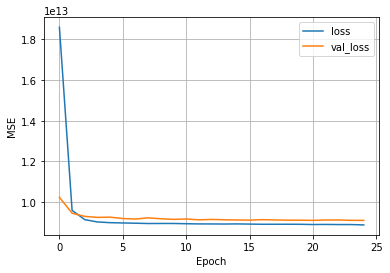

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.02, iters 25, err 9144720034912.07
---------------------------------------------------------------------------------------


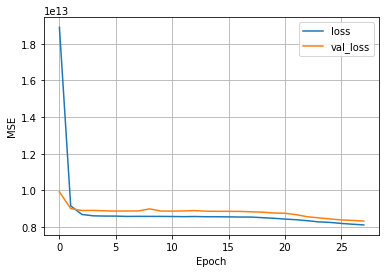

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.02, iters 28, err 8412866884667.321
---------------------------------------------------------------------------------------


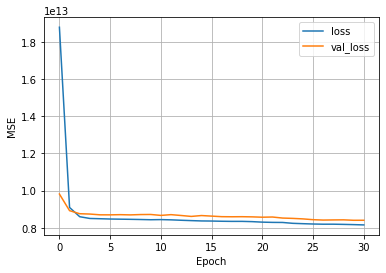

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.02, iters 31, err 8448564127929.599
---------------------------------------------------------------------------------------


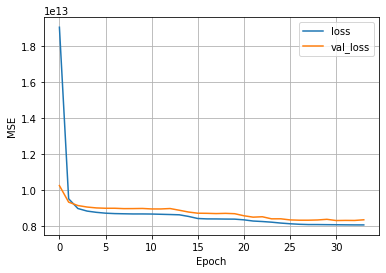

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.02, iters 34, err 8501902474793.898
---------------------------------------------------------------------------------------


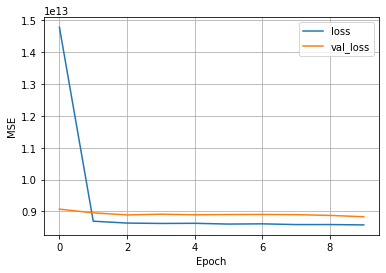

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.04, iters 10, err 8857832043085.855
---------------------------------------------------------------------------------------


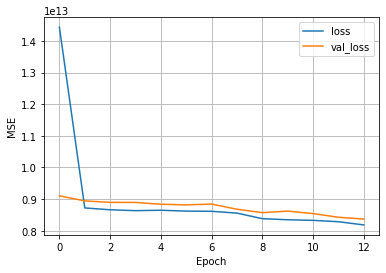

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.04, iters 13, err 8457089167795.089
---------------------------------------------------------------------------------------


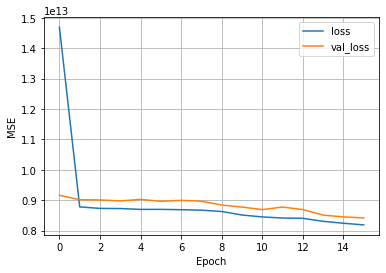

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.04, iters 16, err 8539406907600.253
---------------------------------------------------------------------------------------


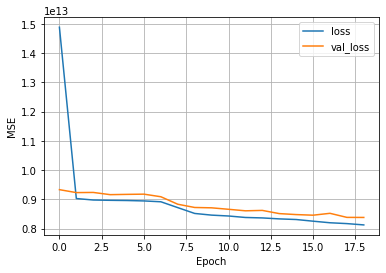

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.04, iters 19, err 8415368933987.369
---------------------------------------------------------------------------------------


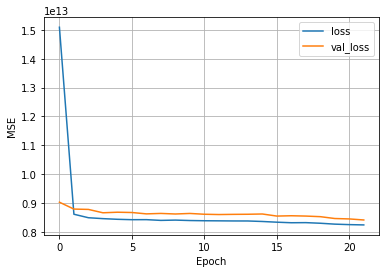

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.04, iters 22, err 8499958353425.881
---------------------------------------------------------------------------------------


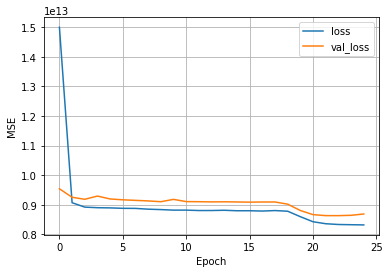

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.04, iters 25, err 8670951431100.946
---------------------------------------------------------------------------------------


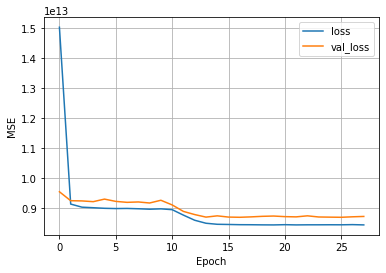

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.04, iters 28, err 8761284292233.472
---------------------------------------------------------------------------------------


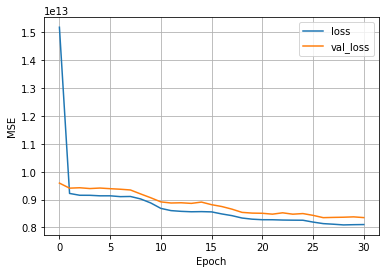

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.04, iters 31, err 8443924051729.981
---------------------------------------------------------------------------------------


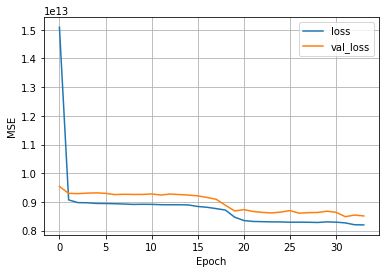

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.04, iters 34, err 8482064898613.753
---------------------------------------------------------------------------------------


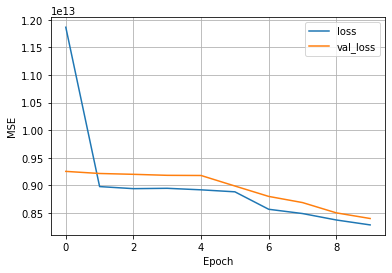

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.1, iters 10, err 8472644478782.697
---------------------------------------------------------------------------------------


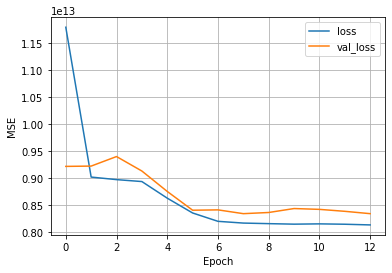

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.1, iters 13, err 8414686578558.478
---------------------------------------------------------------------------------------


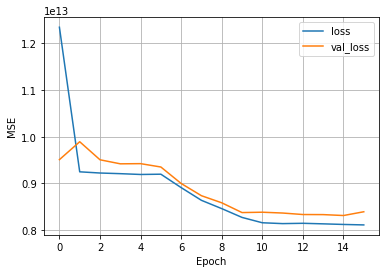

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.1, iters 16, err 8448687148238.512
---------------------------------------------------------------------------------------


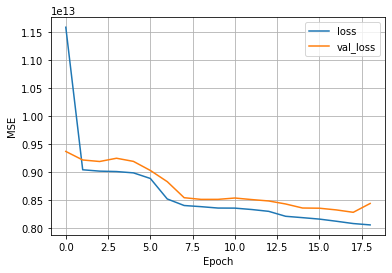

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.1, iters 19, err 8599206956176.06
---------------------------------------------------------------------------------------


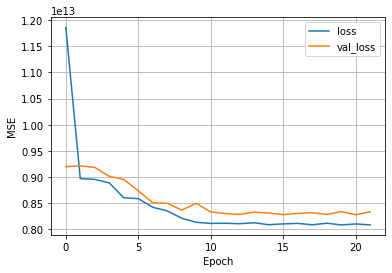

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.1, iters 22, err 8405452325468.14
---------------------------------------------------------------------------------------


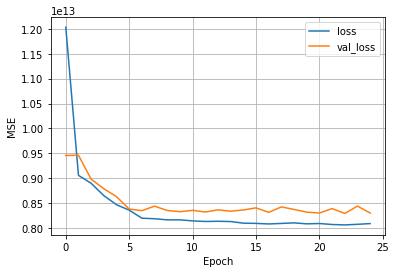

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.1, iters 25, err 8364133791337.64
---------------------------------------------------------------------------------------


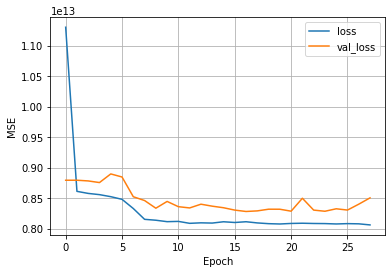

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.1, iters 28, err 8678270464893.088
---------------------------------------------------------------------------------------


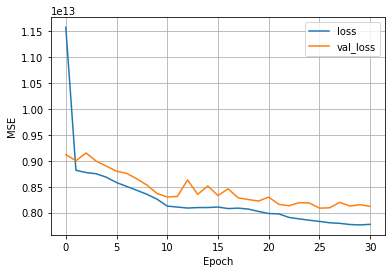

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.1, iters 31, err 8191443163218.242
---------------------------------------------------------------------------------------


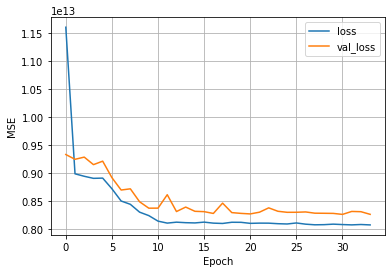

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.1, iters 34, err 8355144717037.737
---------------------------------------------------------------------------------------


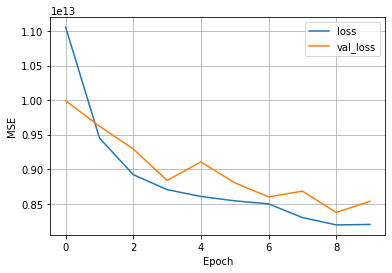

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.2, iters 10, err 8674017427594.964
---------------------------------------------------------------------------------------


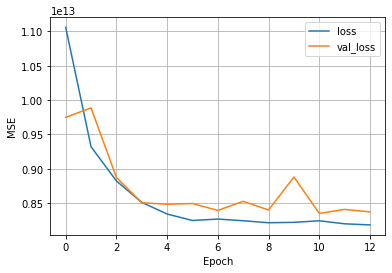

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.2, iters 13, err 8388378370846.786
---------------------------------------------------------------------------------------


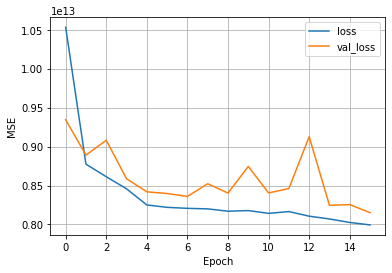

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.2, iters 16, err 8270772258183.954
---------------------------------------------------------------------------------------


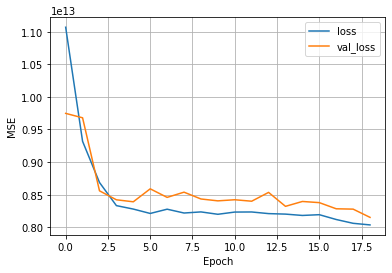

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.2, iters 19, err 8218977722185.298
---------------------------------------------------------------------------------------


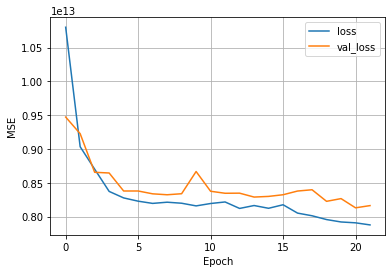

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.2, iters 22, err 8282125103657.867
---------------------------------------------------------------------------------------


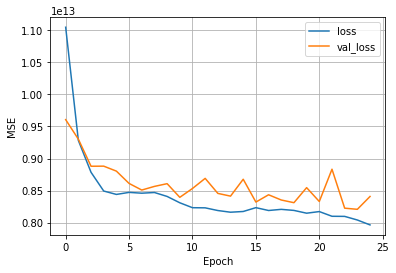

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.2, iters 25, err 8595602769747.201
---------------------------------------------------------------------------------------


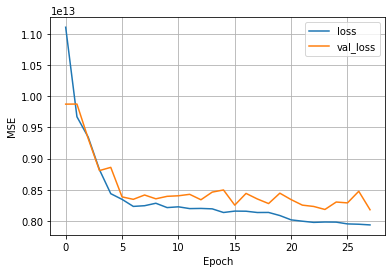

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.2, iters 28, err 8311099460347.536
---------------------------------------------------------------------------------------


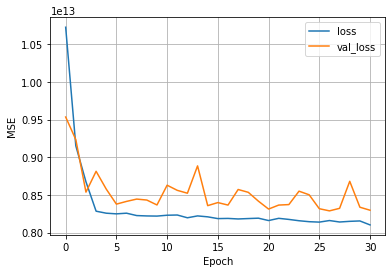

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.2, iters 31, err 8353595136594.779
---------------------------------------------------------------------------------------


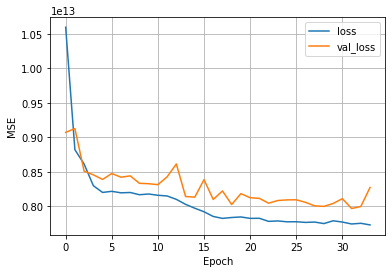

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.2, iters 34, err 8328341879088.677
---------------------------------------------------------------------------------------


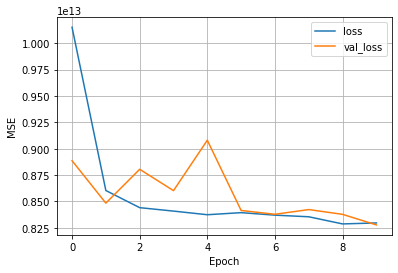

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.4, iters 10, err 8329601155479.589
---------------------------------------------------------------------------------------


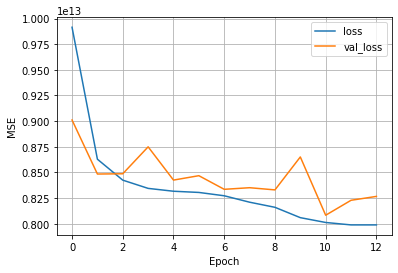

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.4, iters 13, err 8451312850467.4375
---------------------------------------------------------------------------------------


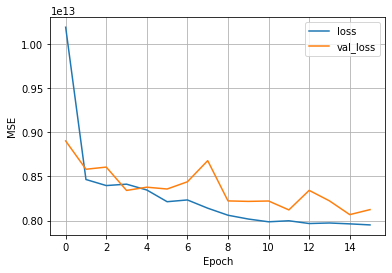

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.4, iters 16, err 8371431050794.653
---------------------------------------------------------------------------------------


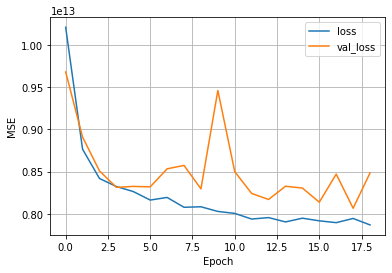

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.4, iters 19, err 8431524665235.189
---------------------------------------------------------------------------------------


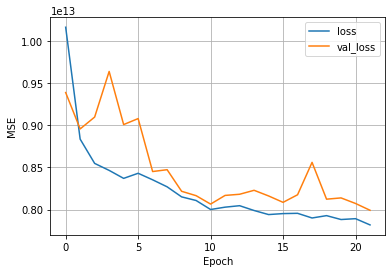

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.4, iters 22, err 8226067462439.676
---------------------------------------------------------------------------------------


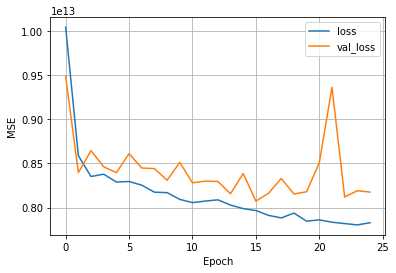

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.4, iters 25, err 8417385091944.33
---------------------------------------------------------------------------------------


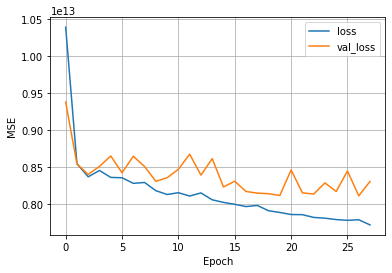

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.4, iters 28, err 8613863788055.773
---------------------------------------------------------------------------------------


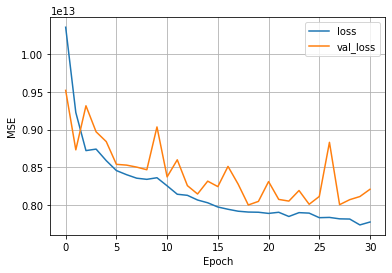

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.4, iters 31, err 8512201367914.476
---------------------------------------------------------------------------------------


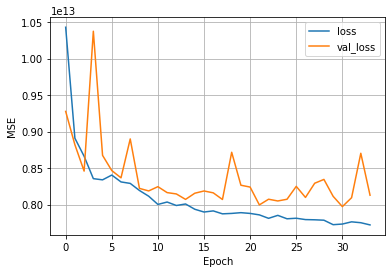

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 32, lr 0.4, iters 34, err 8342326953542.774
---------------------------------------------------------------------------------------


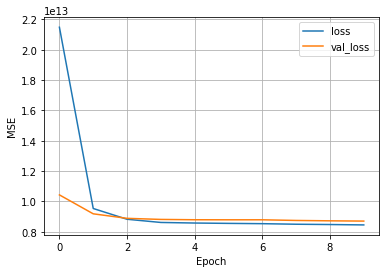

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.01, iters 10, err 8763560431960.784
---------------------------------------------------------------------------------------


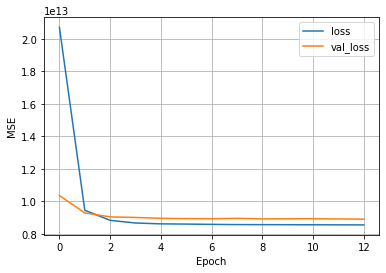

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.01, iters 13, err 8835949651227.18
---------------------------------------------------------------------------------------


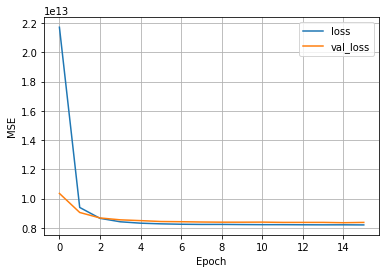

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.01, iters 16, err 8621863844654.573
---------------------------------------------------------------------------------------


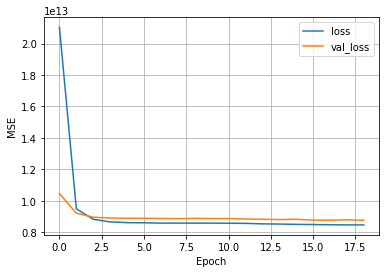

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.01, iters 19, err 8789394688663.922
---------------------------------------------------------------------------------------


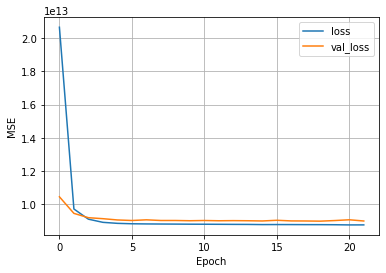

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.01, iters 22, err 8979227036520.482
---------------------------------------------------------------------------------------


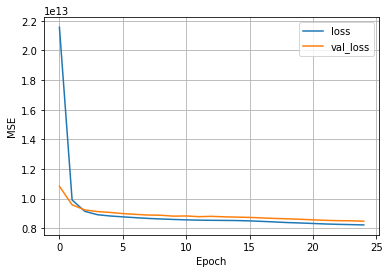

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.01, iters 25, err 8523236157339.082
---------------------------------------------------------------------------------------


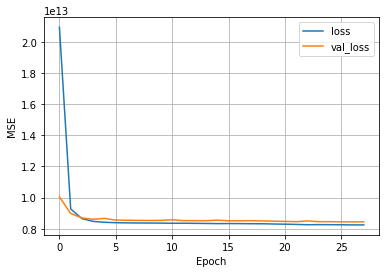

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.01, iters 28, err 8598845943206.709
---------------------------------------------------------------------------------------


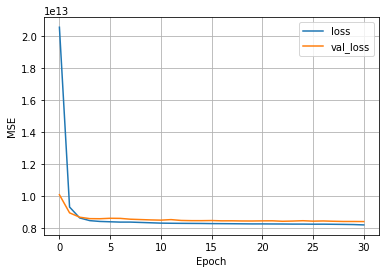

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.01, iters 31, err 8553004663133.804
---------------------------------------------------------------------------------------


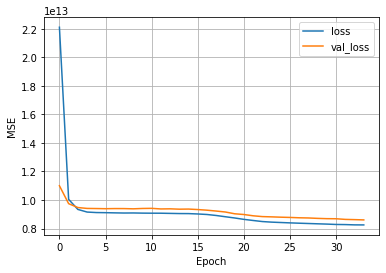

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.01, iters 34, err 8555259322158.549
---------------------------------------------------------------------------------------


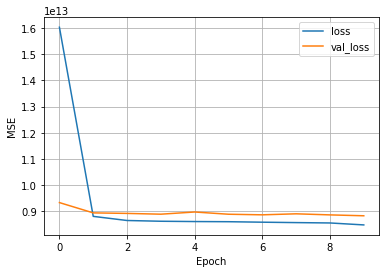

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.02, iters 10, err 8768282156780.559
---------------------------------------------------------------------------------------


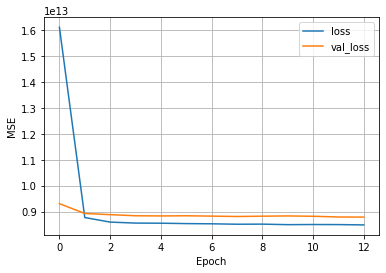

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.02, iters 13, err 8771794324431.485
---------------------------------------------------------------------------------------


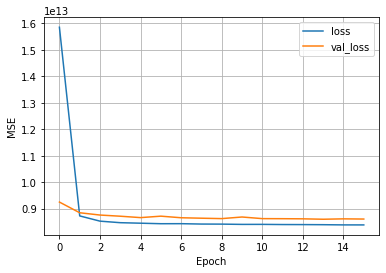

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.02, iters 16, err 8711332732233.021
---------------------------------------------------------------------------------------


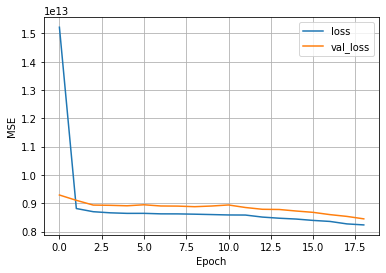

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.02, iters 19, err 8517055432700.924
---------------------------------------------------------------------------------------


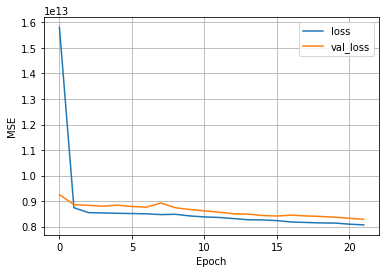

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.02, iters 22, err 8390140060649.957
---------------------------------------------------------------------------------------


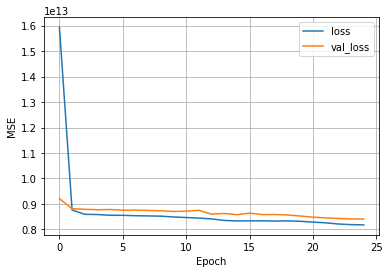

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.02, iters 25, err 8454016563978.887
---------------------------------------------------------------------------------------


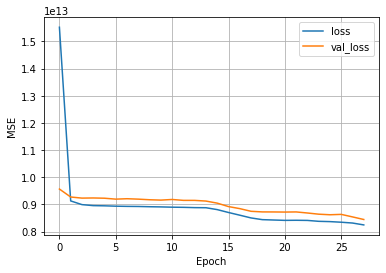

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.02, iters 28, err 8550088967752.445
---------------------------------------------------------------------------------------


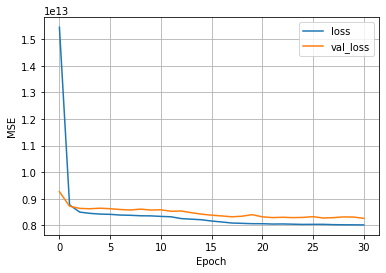

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.02, iters 31, err 8351752310655.342
---------------------------------------------------------------------------------------


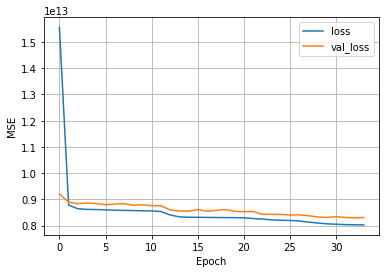

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.02, iters 34, err 8435120002821.7705
---------------------------------------------------------------------------------------


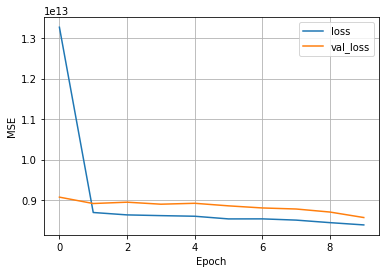

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.04, iters 10, err 8660957362295.097
---------------------------------------------------------------------------------------


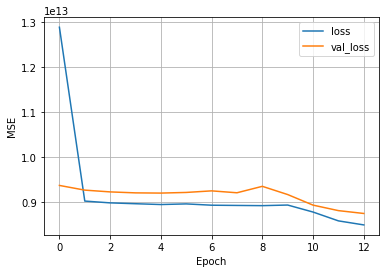

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.04, iters 13, err 8765258042728.933
---------------------------------------------------------------------------------------


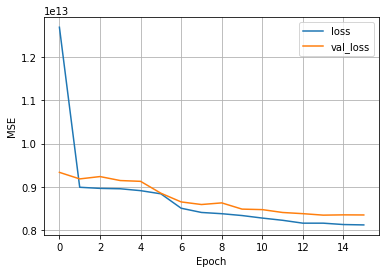

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.04, iters 16, err 8441187278322.692
---------------------------------------------------------------------------------------


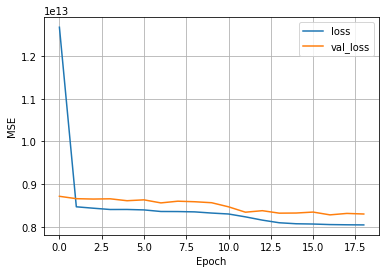

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.04, iters 19, err 8361949968938.559
---------------------------------------------------------------------------------------


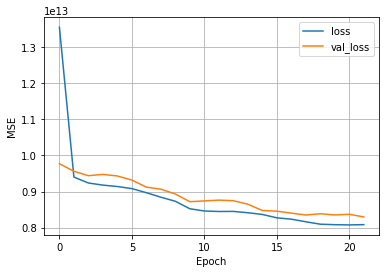

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.04, iters 22, err 8366954322802.428
---------------------------------------------------------------------------------------


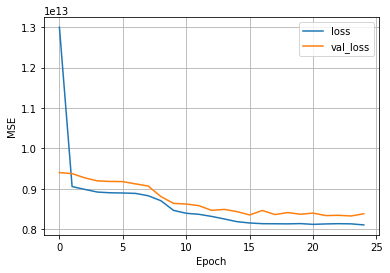

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.04, iters 25, err 8509139122435.125
---------------------------------------------------------------------------------------


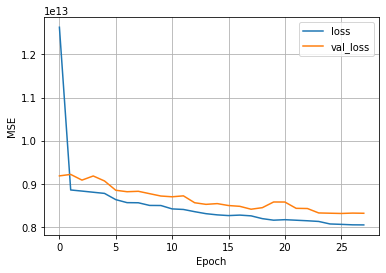

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.04, iters 28, err 8369494331266.921
---------------------------------------------------------------------------------------


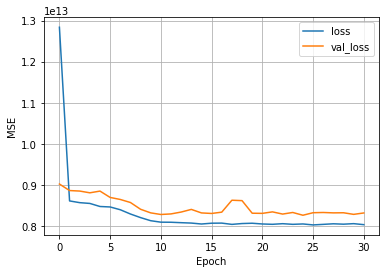

438/438 [==============================] - 1s 2ms/step
layersnum 2, layersize 64, lr 0.04, iters 31, err 8371685850112.87
---------------------------------------------------------------------------------------


KeyboardInterrupt: ignored

In [284]:
bestnn = None
minerr = float('inf')

for layersnum in range(2, 5):
  for layersize in [16, 32, 64]:
    for lr in [0.01, 0.02, 0.04, 0.1, 0.2, 0.4]:
      for iters in range(10, 35, 3):
        layers = [all_normalizer]
        for i in range(layersnum):
          layers.append(tf.keras.layers.Dense(layersize, activation='relu'))
        layers.append(tf.keras.layers.Dense(1))
        nn_model = tf.keras.Sequential(layers)
        nn_model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=lr), loss='mean_squared_error')


        history = nn_model.fit(
            X_train_all, y_train_all,
            validation_data=(X_val_all, y_val_all),
            verbose=0, epochs=iters
        )

        plot_loss(history)

        y_pred_nn = nn_model.predict(X_test_all)
        err = MSE(y_pred_nn, y_test_all)
        
        print(f"layersnum {layersnum}, layersize {layersize}, lr {lr}, iters {iters}, err {err}")
        print(f"---------------------------------------------------------------------------------------")

        if err < minerr:
          minerr = err
          bestnn = nn_model



In [ ]:
for n in range(3, 20, 3):
  print(n)

In [6]:
# calculate the MSE for both linear reg and nn
y_pred_lr = all_reg.predict(X_test_all)
y_pred_nn = nn_model.predict(X_test_all)
y_best_nn = bestnn.predict(X_test_all)

NameError: ignored

In [5]:
def MSE(y_pred, y_real):
  return (np.square(y_pred - y_real)).mean()

In [4]:
MSE(y_pred_lr, y_test_all)

NameError: ignored

In [3]:
MSE(y_best_nn, y_test_all)

NameError: ignored

In [ ]:
MSE(y_pred_nn, y_test_all)

8296039087353.263

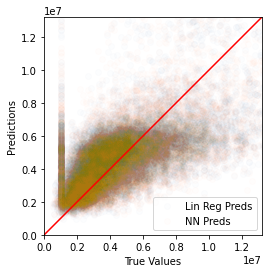

In [138]:
ax = plt.axes(aspect="equal")
plt.scatter(y_test_all, y_pred_lr, label="Lin Reg Preds", alpha=0.01)
plt.scatter(y_test_all, y_pred_nn, label="NN Preds", alpha=0.01)
plt.xlabel("True Values")
plt.ylabel("Predictions")
lims = [0, 13203873]
plt.xlim(lims)
plt.ylim(lims)
plt.legend()
_ = plt.plot(lims, lims, c="red")

#Result

In [140]:
ts = pd.read_csv("drive/MyDrive/jupyter/Test.csv")
ts.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,3546,2011-1,566,1.0,5,52,2,1,25.0,NaN,...,0,0,0,0,0,0,0,0,0,0
1,27171,2011-2,416,0.0,3,58,3,0,5.0,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3329,2011-1,62,NaN,1,41,2,0,25.0,1.0,...,0,0,0,0,0,0,0,0,0,0
3,46156,2011-6,560,1.0,9,60,3,1,30.0,0.0,...,0,0,0,0,0,0,0,0,0,0
4,27435,2011-2,465,NaN,3,72,2,1,NaN,0.0,...,0,0,0,0,0,0,1,0,0,0


In [141]:
ts.g_lift = ts.g_lift.fillna(0)

In [142]:
ts.build_tech = ts.build_tech.fillna(0)

In [143]:
ts.metro_dist = ts.metro_dist.fillna(ts.metro_dist.mean())

In [144]:
ts.head()

,id,date,street_id,build_tech,floor,area,rooms,balcon,metro_dist,g_lift,...,kw4,kw5,kw6,kw7,kw8,kw9,kw10,kw11,kw12,kw13
0,3546,2011-1,566,1.0,5,52,2,1,25.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
1,27171,2011-2,416,0.0,3,58,3,0,5.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
2,3329,2011-1,62,0.0,1,41,2,0,25.000000,1.0,...,0,0,0,0,0,0,0,0,0,0
3,46156,2011-6,560,1.0,9,60,3,1,30.000000,0.0,...,0,0,0,0,0,0,0,0,0,0
4,27435,2011-2,465,0.0,3,72,2,1,22.133151,0.0,...,0,0,0,0,0,0,1,0,0,0


In [178]:
ts.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 24 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   id          30000 non-null  int64  
 1   date        30000 non-null  object 
 2   street_id   30000 non-null  int64  
 3   build_tech  30000 non-null  float64
 4   floor       30000 non-null  int64  
 5   area        30000 non-null  int64  
 6   rooms       30000 non-null  int64  
 7   balcon      30000 non-null  int64  
 8   metro_dist  30000 non-null  float64
 9   g_lift      30000 non-null  float64
 10  n_photos    30000 non-null  int64  
 11  kw1         30000 non-null  int64  
 12  kw2         30000 non-null  int64  
 13  kw3         30000 non-null  int64  
 14  kw4         30000 non-null  int64  
 15  kw5         30000 non-null  int64  
 16  kw6         30000 non-null  int64  
 17  kw7         30000 non-null  int64  
 18  kw8         30000 non-null  int64  
 19  kw9         30000 non-nul

In [148]:
ts.columns[2:]

Index(['street_id', 'build_tech', 'floor', 'area', 'rooms', 'balcon',
       'metro_dist', 'g_lift', 'n_photos', 'kw1', 'kw2', 'kw3', 'kw4', 'kw5',
       'kw6', 'kw7', 'kw8', 'kw9', 'kw10', 'kw11', 'kw12', 'kw13'],
      dtype='object')

In [179]:
X_problem_test_all = get_x(ts, "price", x_labels=ts.columns[2:])
X_problem_test_all

array([[566.,   1.,   5., ...,   0.,   0.,   0.],
       [416.,   0.,   3., ...,   0.,   0.,   0.],
       [ 62.,   0.,   1., ...,   0.,   0.,   0.],
       ...,
       [260.,   0.,   4., ...,   0.,   0.,   0.],
       [531.,   1.,   5., ...,   0.,   0.,   0.],
       [319.,   0.,   3., ...,   0.,   0.,   0.]])

In [180]:
print(len(X_problem_test_all))
print(len(X_problem_test_all[0]))

30000
22


In [152]:
X_test_all

array([[362.,   0.,   5., ...,   0.,   0.,   0.],
       [489.,   0.,   4., ...,   0.,   0.,   0.],
       [160.,   1.,   3., ...,   0.,   0.,   0.],
       ...,
       [276.,   0.,  20., ...,   0.,   0.,   0.],
       [629.,   1.,   5., ...,   0.,   0.,   0.],
       [269.,   1.,   8., ...,   0.,   0.,   0.]])

In [221]:
y_problem_pred_nn = nn_model.predict(X_problem_test_all)
y_problem_pred_nn

938/938 [==============================] - 2s 2ms/step


array([[4777291.5],
       [4718069.5],
       [1728003.9],
       ...,
       [5528409.5],
       [5922676.5],
       [1819976.9]], dtype=float32)

In [222]:
ans_array = y_problem_pred_nn.reshape(1,-1)
ans_array[0]

array([4777291.5, 4718069.5, 1728003.9, ..., 5528409.5, 5922676.5,
       1819976.9], dtype=float32)

In [223]:
ans = copy.deepcopy(ts)
ans = ans.drop(ts.columns[1:], axis=1)
ans.head()

,id
0,3546
1,27171
2,3329
3,46156
4,27435


In [224]:
ans['price'] = pd.Series(ans_array[0])
ans.head()

,id,price
0,3546,4.777292e+06
1,27171,4.718070e+06
2,3329,1.728004e+06
3,46156,6.425978e+06
4,27435,1.112514e+07


In [225]:
ans.to_csv("drive/MyDrive/jupyter/out.csv", index=False)